In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 54.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [ ]:
import pandas as pd
from pycaret.datasets import get_data
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = get_data('germany')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


In [ ]:
basket_matrix = df.groupby(['InvoiceNo', 'Description']).size().unstack(fill_value=0)
basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0)

In [ ]:
itemsets = apriori(basket_matrix, min_support=0.01, use_colnames=True)
rules_df = association_rules(itemsets, metric="lift", min_threshold=1.0)

In [ ]:
rules_df['antecedents'] = rules_df['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_df['consequents'] = rules_df['consequents'].apply(lambda x: ', '.join(list(x)))

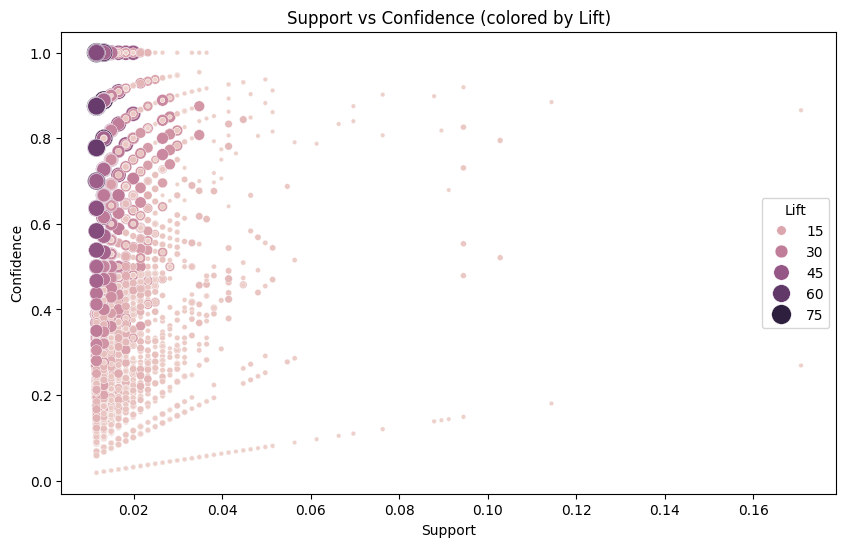

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', sizes=(10, 200), hue='lift', data=rules_df)
plt.title('Support vs Confidence (colored by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best', title='Lift')
plt.show()

In [ ]:
fig = px.scatter_3d(rules_df, x='support', y='confidence', z='lift', color='lift', size='lift', hover_data=['antecedents', 'consequents'])
fig.update_layout(title='3D Plot of Association Rules (Support vs Confidence vs Lift)')
fig.show()

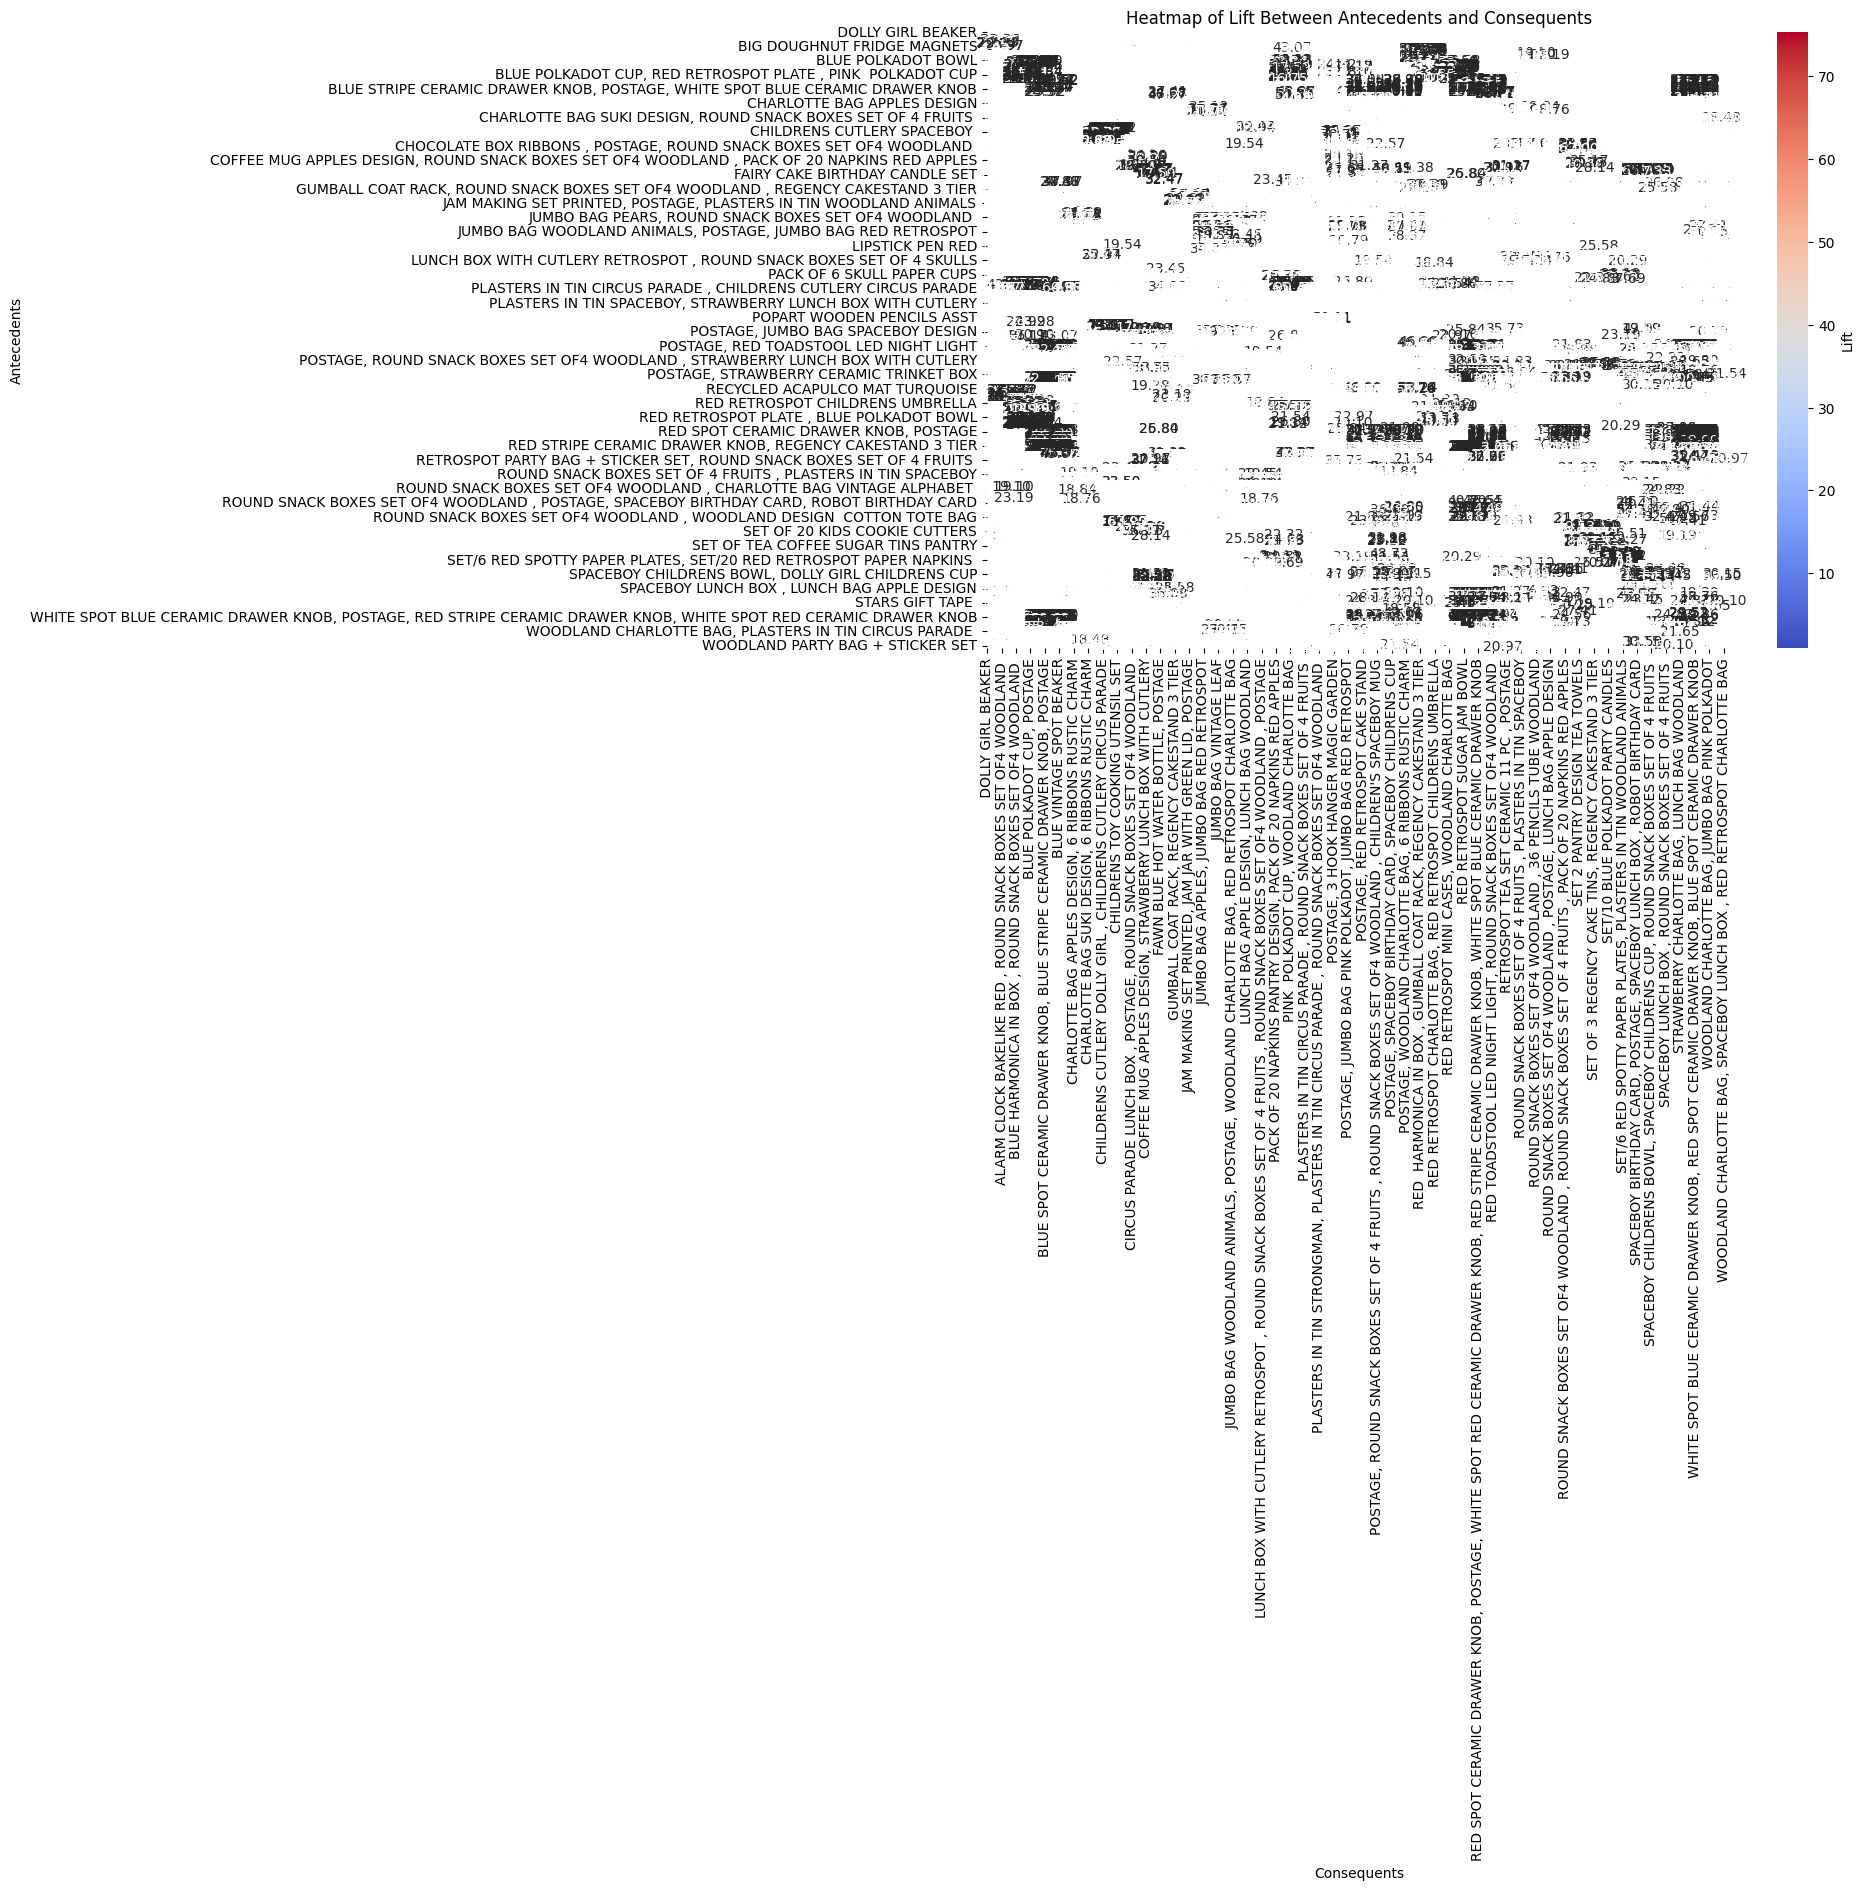

In [ ]:
heatmap_matrix = rules_df.pivot(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Lift'})
plt.title('Heatmap of Lift Between Antecedents and Consequents')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()